### 파이썬으로 데이터 주무르기 by 민형기 도서의 예제

1. 서울시 자치구별 데이터
    - 서울시 자치구별 CCTV 설치 data 
    - 서울시 자치구별 인구 data 


#### 분석내용
1. 서울시 각 구별 CCTV 수를 파악하고, 인구대비 CCTV 비율을 구해 구별 순위 비교
2. 인구대비 CCTV의 평균치를 확인하고 CCTV가 과하게 부족한 구를 확인
    - CCTV 설치가 영향을 미치는 data를 찾아보기
        - 한국인, 외국인, 고령자 인구 그룹이 CCTV 설치에 영향을 미쳤는가?

In [1]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

1. 관련파일 읽어와서 파일 상태 확인 후 전처리

- 결측치 정리

In [4]:
## cctv data 읽어오기
cctv_seoul = pd.read_csv('./data/data/01. CCTV_in_Seoul.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
# 컬럼명 추출
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [10]:
# 기관명이 자치구에 해당되므로 기관명 -> 구별 로 변경
# df.rename(columns={바꿀데이터(위치):새로운 값})
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [14]:
# 인구데이터 가져오기 - 엑셀파일
# pd.read_excel('파일명')
pop_seoul = pd.read_excel('./data/data/01.population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


- ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

- !pip install xlrd

In [13]:
# !pip install xlrd
# 설치 후 엑셀파일 잘 가져와짐

                                              0.0/96.5 kB ? eta -:--:--
     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00


In [15]:
# 필요 data만 추출 
# 사용할 열 : 자치구, 전체인구수, 한국인, 외국인, 고령자(B,D,G,J,N 열)
# usecols='선택열'
# header = 2 행을 header로 처리
pop_seoul = pd.read_excel('./data/data/01.population_in_Seoul.xls',
                         header=2,
                         usecols='B,D,G,J,N')

pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [16]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [18]:
# 각 데이터 파악하기
cctv_seoul.info()
pop_seoul.info()

# 인구데이터는 불필요한 행 2개가 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [19]:
# 인구데이터 0번 행은 합계 데이터 -> 삭제
pop_seoul.drop([0], inplace=True)

In [21]:
pop_seoul.head(2)
pop_seoul.info()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [23]:
# 구별 데이터가 중복되지는 않았는지 확인
pop_seoul.구별.unique()  # 중복데이터 제외하고 반환
len(pop_seoul.구별.unique())
# nan이 포함된 행이 있다.

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

26

In [26]:
# 결측치 있는 행을 제거 시 
# isnull() 활용 : null 이면 True반환
pop_seoul[pop_seoul.구별.isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [27]:
# 26행 제거
pop_seoul.drop(26, inplace=True)

In [28]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [29]:
pop_seoul.구별.unique()
set(cctv_seoul.구별)
# 25개구 data만 존재하는 것 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

### 가공필드 생성, 절대 data 를 이용해서 몇가지 내용 확인

In [30]:
cctv_seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [34]:
# 설치대수가 적은 5개 구를 확인
cctv_seoul.sort_values(by='소계').head(5)

# 도봉구의 설치대수가 가장 적다.

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [35]:
# 설치대수가 많은 5개 구를 확인
cctv_seoul.sort_values(by='소계', ascending=False).head(5)

# 강남구의 설치대수가 가장 많다.

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


### 최근 증가율 가공필드 생성
- 설치대수 절대량이 도봉구가 가장 적다
    - 도봉구는 설치를 늘리지 않고 있는 지 확인
    <hr>
- 최근증가율 = (3개년 설치대수) / 2013년도이전 설치대수 * 100

In [36]:
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + 
                            cctv_seoul['2015년'] +
                            cctv_seoul['2016년']) / cctv_seoul['2013년도 이전'] * 100

In [38]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [39]:
# data상 최근 3개년 동안 cctv 설치 증가율이 가장 높은 3개 구
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911


### 인구데이터의 가공필드 생성/기본분석

In [41]:
# 어느 구의 인구가 가장 많은가? 
pop_seoul.head(2)
pop_seoul.sort_values(by='인구수', ascending=False).head(5)

# 송파구, 강서구, 강남구 순으로 인구수가 많음

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


,구별,인구수,한국인,외국인,고령자
24,송파구,667483.0,660584.0,6899.0,72506.0
16,강서구,603772.0,597248.0,6524.0,72548.0
23,강남구,570500.0,565550.0,4950.0,63167.0
11,노원구,569384.0,565565.0,3819.0,71941.0
21,관악구,525515.0,507203.0,18312.0,68082.0


In [43]:
# 고령자수가 많은 자치구
pop_seoul.sort_values(by='고령자', ascending=False).head(5)
# 강서구/송파/은평
# 외국인이 많은 자치구
pop_seoul.sort_values(by='외국인', ascending=False).head(5)
# 영등포/구로/금천

,구별,인구수,한국인,외국인,고령자
16,강서구,603772.0,597248.0,6524.0,72548.0
24,송파구,667483.0,660584.0,6899.0,72506.0
12,은평구,494388.0,489943.0,4445.0,72334.0
11,노원구,569384.0,565565.0,3819.0,71941.0
21,관악구,525515.0,507203.0,18312.0,68082.0


,구별,인구수,한국인,외국인,고령자
19,영등포구,402985.0,368072.0,34913.0,52413.0
17,구로구,447874.0,416487.0,31387.0,56833.0
18,금천구,255082.0,236353.0,18729.0,32970.0
21,관악구,525515.0,507203.0,18312.0,68082.0
6,동대문구,369496.0,354079.0,15417.0,54173.0


In [44]:
# 지자체별 전체 인구수 대비 고령자/외국인의 비율 계산
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수'] * 100

In [46]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [47]:
# 인구수대비 외국인/고령자 비율이 높은 자치구 확인
pop_seoul.sort_values(by='외국인비율', ascending=False).head(5)
# 전통적으로 외국인이 많이 거주하는 구 영등포/구로/금천 이므로 높게 나타났고
# 중구/용산구는 오피스가 많은 지역이므로 인구는 많지 않지만 파견된 외국인들이 많이 거주하는 지역으로 알려짐
pop_seoul.sort_values(by='고령자비율', ascending=False).head(5)
# 강북구는 절대적인 인구수는 적은지역 (2017년 당시는 개발이 덜된 구도심 지역)- 토박이분들이 많이 거주
# 종로, 중구, 용산 대표적인 오피스 지역이고 구도심-토박이분들이 많이 거주하는 지역

# 단, 2017년도 기준의 분석이기때문에 2023년도에는 많은 변화가 있음

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


### 인구대비 cctv 대수의 적정성을 확인
- 두 df를 병합해서 새로운 data 생성 후 분석

In [48]:
# 구별 컬럼명을 기준으로 병합
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [49]:
# 불필요한 컬럼 삭제
# del data_result['2013년도 이전']
# del data_result['2014년']
# del data_result['2015년']
# del data_result['2016년']

In [51]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [52]:
# df에서 행을 유일하게 구별하는 data('구별')를 행인덱스로 설정
# 시각화 시 효율적임

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 인구 관련한 data와 cctv 관련한 data들 간의 상관성을 확인
- 상관성 잇는 컬럼이 있는지 확인
    - 서로 관련있는 컬럼에 대해서 그래프를 그려서 적정 cctv 대수 확인
<hr>
- 상관계수 분석
    - 계수값이 절대값으로 0.3을 넘어가면 상관관계가 있다 라고 판단한다
        - 0.1 이하면 무시 -> 상관성이 없다
        - 0.7 이상이면 아주 강한 상관관계가 있다고 판단
        - 0.1 < 계수값 <= 0.3 약한 상관관계를 추청할수 있다고 판단
    - 값이 '-'면 음의 상관 : 두 변수의 값 중 하나가 증가하면 하나는 감소한다
    - 값이 '+'면 양의 상관 :  두 변수의 값 중 하나가 증가하거나 감소하면 나머지 변수의 값도 증가하거나 감소한다.(같은 방향성으로 움직인다 라고 이해) 

In [55]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.243220,0.238638,0.027950,0.175518,-0.052302,-0.258663
최근증가율,-0.264378,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.243220,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.238638,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,0.027950,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.175518,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.052302,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.258663,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [58]:
# np.corrcoef(데이터값1, 데이터값2) 상관계수를 구해주는 함수
np.corrcoef(data_result['소계'], data_result['인구수'])
# 약한 양의 상관

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [59]:
np.corrcoef(data_result['소계'], data_result['고령자'])
# 약한 음의 상관

array([[1.        , 0.17551765],
       [0.17551765, 1.        ]])

In [60]:
np.corrcoef(data_result['소계'], data_result['외국인비율'])
# 관계가 없음

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

- cctv 절대수와 전체인구수가 약하지만 상관관계가 있으므로 두 데이터를 활용해서 인구당 적정 cctv대수 추정
    - 고령자 비율도 음의 상관이 있지만, 전체 인구를 이야기 하지 않으므로 제외

### CCTV vs 인구 현황 시각화 작업

In [61]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Figure size 1000x1000 with 0 Axes>

<Axes: ylabel='구별'>

<Figure size 1000x1000 with 0 Axes>

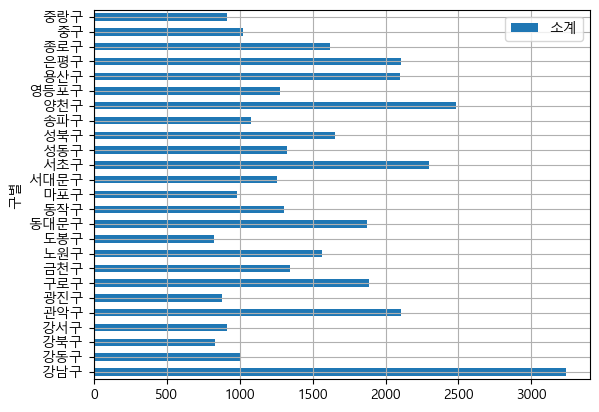

In [63]:
# 전체 자치구별 cctv 대수의 차이 확인 시각화
plt.figure(figsize=(10,10))
data_result[['소계']].plot(kind='barh', grid=True)
plt.show()

<Figure size 800x800 with 0 Axes>

<Axes: ylabel='구별'>

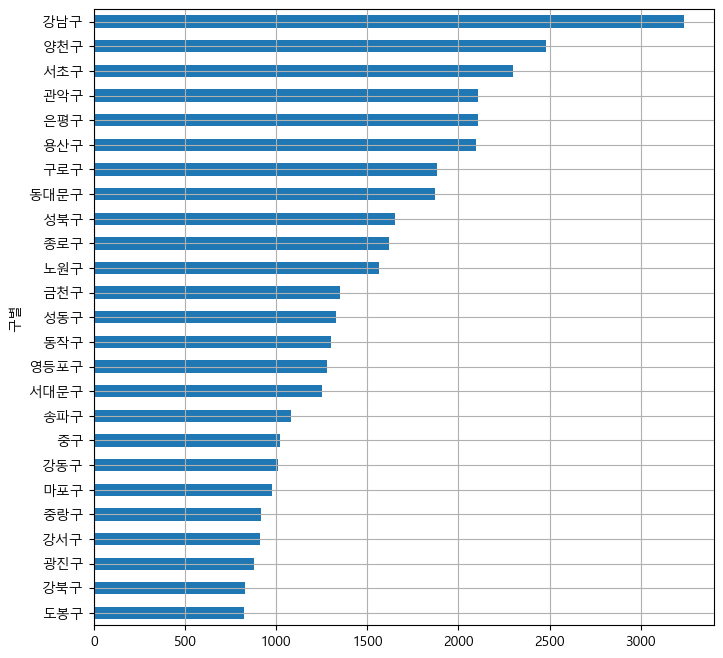

In [65]:
# 데이터 정렬 후 시각화
plt.figure(figsize=(8,8))
sort_cctv = data_result['소계'].sort_values()
sort_cctv.plot(kind='barh', grid=True)
plt.show()

### 강남구와 도봉구의 cctv 절대 대수의 차이가 굉장히 크다

- 인구수 대비 cctv 설치 비율을 확인해서 절대 대수와의 차이를 확인
- 인구수와 설치비율 데이터의 관계를 시각화
- 가공필드 생성(인구수대비 cctv 설치비율)

In [66]:
data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


<Axes: ylabel='구별'>

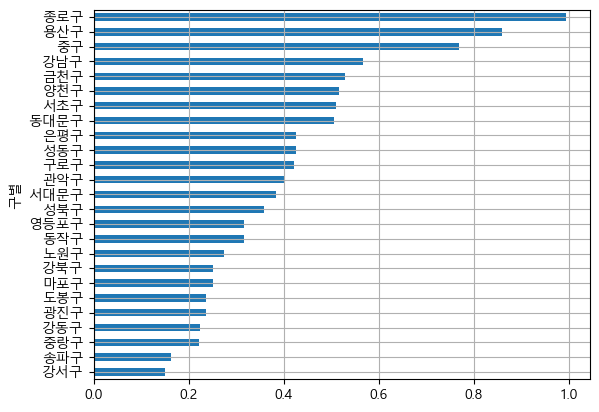

In [69]:
# 자치구별 인구대비 cctv 비율의 차이 확인
data_result['cctv비율'].sort_values().plot(kind='barh', grid=True)
plt.show()

- 용산, 중구, 종로구, 강남구는 대표적으로 유동인구가 많은 지역임
    - 거주인원보다 유동인원이 많음
    - 유동인구의 영향으로 인구대비 cctv 비율이 높다 

Text(0.5, 0, '인구수')

Text(0, 0.5, '구별 cctv 수')

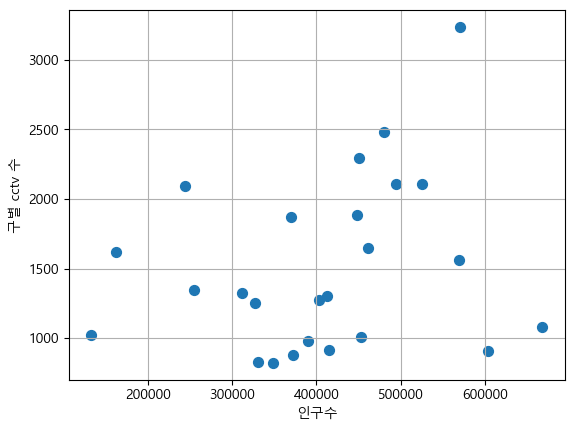

In [71]:
# 인구수 vs cctv 소계의 분산 그래프(scatter)
plt.scatter(data_result.인구수, data_result.소계, s=50)
plt.xlabel('인구수')
plt.ylabel('구별 cctv 수')
plt.grid()

### 인구수와 cctv 소계 데이터의 관계를 대표할 대표직선을 이용 
- 대표직선을 그리고 인구대비 적정 cctv 대수를 확인
- 대표직선을 이용해서 적정 cctv 대수보다 cctv 대수가 많거나 적은 10개 자치구에 표시